In [18]:
!pip install pysam
import pysam
import pandas as pd
import numpy as np

!pip install biopython

from Bio.Seq import Seq
from Bio.Alphabet import generic_dna

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# BED6+4 format.

**chrom** - Name of the chromosome (or contig, scaffold, etc.).<br>
**chromStart** - The starting position of the feature in the chromosome or scaffold. The first base in a chromosome is numbered 0.<br>
**chromEnd** - The ending position of the feature in the chromosome or scaffold. The chromEnd base is not included in the display of the **feature**. For example, the first 100 bases of a chromosome are defined aschromStart=0, chromEnd=100, and span the bases numbered 0-99.<br>
**name** - Name given to a region (preferably unique). Use '.' if no name is assigned.<br>
**score** - Indicates how dark the peak will be displayed in the browser (0-1000). If all scores were '0' when the data were submitted to the DCC, the DCC assigned scores 1-1000 based on signal value. Ideally the average signalValue per base spread is between 100-1000.<br>
**strand** - +/- to denote strand or orientation (whenever applicable). Use '.' if no orientation is assigned.<br>
**signalValue** - Measurement of overall (usually, average) enrichment for the region.<br>
**pValue** - Measurement of statistical significance (-log10). Use -1 if no pValue is assigned.<br>
**qValue** - Measurement of statistical significance using false discovery rate (-log10). Use -1 if no qValue is assigned.<br>
**peak** - Point-source called for this peak; 0-based offset from chromStart. Use -1 if no point-source called.<br>

In [22]:
bed_path = '/content/gdrive/My Drive/Seq Insights/ENCFF667LOH.bed'
df = pd.read_csv(bed_path, sep='\t')
df.columns = [
    'chrom',
    'chromStart',
    'chromEnd',
    'name',
    'score',
    'strand',
    'signalValue',
    'pValue',
    'qvalue',
    'peak'
  ]

df['length'] = df['chromEnd'] - df['chromStart'] + 1
print(df.head(100))
print()


    chrom  chromStart   chromEnd name  score strand  signalValue  pValue  \
0   chr17    29293141   29293621    .    544      .     10.75834    -1.0   
1   chr19    17467907   17468387    .    553      .     10.76597    -1.0   
2    chr5   137754746  137754868    .   1000      .     10.78501    -1.0   
3   chr10   103908379  103908859    .   1000      .     10.80921    -1.0   
4   chr10    15254895   15255375    .   1000      .     10.82610    -1.0   
5    chr7    75914701   75915181    .    631      .     10.84009    -1.0   
6    chr7    44490523   44491142    .   1000      .     10.84396    -1.0   
7   chr19      662259     662739    .    558      .     10.85103    -1.0   
8   chr19     5799051    5799531    .    582      .     10.85113    -1.0   
9   chr12   131194315  131194795    .   1000      .     10.86686    -1.0   
10   chr1    46347923   46348403    .    631      .     10.87003    -1.0   
11   chr6    11938643   11939123    .   1000      .     10.87876    -1.0   
12  chr16   

# Get peaks by chromosome

Peaks in chromosome 1 : 1689
Peaks in chromosome 2 : 829
Peaks in chromosome 3 : 717
Peaks in chromosome 4 : 369
Peaks in chromosome 5 : 570
Peaks in chromosome 6 : 1033
Peaks in chromosome 7 : 773
Peaks in chromosome 8 : 459
Peaks in chromosome 9 : 431
Peaks in chromosome 10 : 499
Peaks in chromosome 11 : 753
Peaks in chromosome 12 : 675
Peaks in chromosome 13 : 143
Peaks in chromosome 14 : 280
Peaks in chromosome 15 : 434
Peaks in chromosome 16 : 630
Peaks in chromosome 17 : 750
Peaks in chromosome 18 : 151
Peaks in chromosome 19 : 1195
Peaks in chromosome 20 : 355
Peaks in chromosome 21 : 134
Peaks in chromosome 22 : 263
Peaks in chromosome X : 301
Peaks in chromosome Y : 0
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y']
[1689, 829, 717, 369, 570, 1033, 773, 459, 431, 499, 753, 675, 143, 280, 434, 630, 750, 151, 1195, 355, 134, 263, 301, 0]


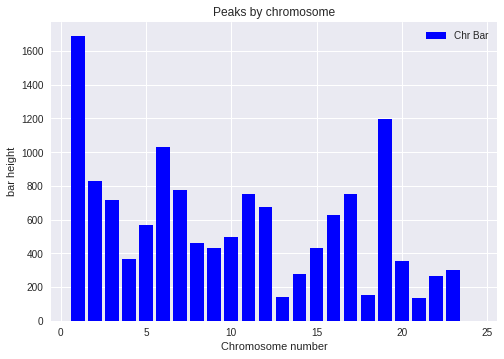

In [23]:
chromosome_types = [str(x) for x in range(1, 23)] + ["X", "Y"]

peak_vector = []

for chrom in chromosome_types:
  chromosome_title = 'chr' + chrom
  
  number_peaks = len(df.loc[df['chrom'] == chromosome_title])
  peak_vector.append(number_peaks)
  
  print('Peaks in chromosome {} : {}'.format(chrom,number_peaks))

print(chromosome_types) 
print(peak_vector) 

import matplotlib.pyplot as plt

plt.bar(range(1, 25), peak_vector, label="Chr Bar", color='b')
plt.plot()

plt.xlabel("Chromosome number")
plt.ylabel("bar height")
plt.title("Peaks by chromosome")
plt.legend()
plt.show()


# Read reference genome example

In [25]:
fasta_path = '/content/gdrive/My Drive/Seq Insights/hg38 (1).fa'
fastafile = pysam.Fastafile(fasta_path)

chromosome = 'chr15'
start = 42491203
end = 42491643
start -= 1

print(fastafile.fetch(chromosome,start,end))

TTTGAACACAAGAGAGTGAACAACGGACACACAGGAAGAGGTTTTTCTCAAAAAGAATGGAGGAAGAACAAAGGCAGGCCCGCTTGCGGGAGAGTCAGTACGCAGCGTTGGACGCTATGAACAGCCTCCCTGGTCCCTTTTTCATTCTCCTTGTTTCTCCTTGTTCTTTCCCGGCCTCCCTGTAGCTCCTACTCTCTTCCTTGGTGTCCCGCCATTTCCTTTAGTCAGTGGCAACTGTTCGGGCTACATTTTGAAAACACTCCTTCCTTGTAAAACTTTCTGAAGTTGaatggaaggtgcaagagctttagaacagccagacctgagtttcagatcttggactagctacgaataatttgtgactttgggtaaattacaattcttcttggaacctcaggttcttgagttaaaattaggataatgttatctcacagggtgttg


# Dataframe to array

In [26]:
array = np.array(df)
print(array[0:3])

[['chr17' 29293141 29293621 '.' 544 '.' 10.758339999999999 -1.0 0.49455
  240 481]
 ['chr19' 17467907 17468387 '.' 553 '.' 10.76597 -1.0 0.49504 240 481]
 ['chr5' 137754746 137754868 '.' 1000 '.' 10.78501 -1.0
  0.49661000000000005 117 123]]


# Get X and Y

In [41]:
X = []
Y = []

a = 0

for i, row in enumerate(array):
  
  length = row[-1]
  
  if i % 2000 == 0:
    print(i,'sequences.')
    
    
  if length != 481:
    continue
  
  
  
  chromosome = row[0]
  start = row[1]
  end = row[2]
  start -= 1
  
  peak = row[6]
  #print(peak)
  
  
  sequence = fastafile.fetch(chromosome,start,end)
  reverse_seq = Seq(sequence, generic_dna)
  reverse_seq = reverse_seq.reverse_complement()
  reverse_seq = reverse_seq._data
  
  
  
  sequence_array = []
  for base, rev_base in zip(sequence, reverse_seq):
    if base == 'A' or base == 'a':
      temp_vector = [1,0,0,0]
    elif base == 'C' or base == 'c':
      temp_vector = [0,1,0,0]
    elif base == 'T' or base == 't':
      temp_vector = [0,0,1,0]
    elif base == 'G' or base == 'g':
      temp_vector = [0,0,0,1]
    else:
      temp_vector = [0,0,0,0]
    
      
      
    if rev_base == 'A' or base == 'a':
      rev_temp_vector = [1,0,0,0]
    elif rev_base == 'C' or base == 'c':
      rev_temp_vector = [0,1,0,0]
    elif rev_base == 'T' or base == 't':
      rev_temp_vector = [0,0,1,0]
    elif rev_base == 'G' or base == 'g':
      rev_temp_vector = [0,0,0,1]
    else:
      rev_temp_vector = [0,0,0,0]
    if a < 10:
      print('base',base)
      print('revbase',rev_base)
      print('temp_vector',base)
      print('rev_temp_vector',rev_temp_vector)
      
          
    
      
    full_vector = temp_vector + rev_temp_vector
    
    if a < 2:
      print('sequence: ',sequence)
      print('reverse_seq: ', reverse_seq)
      print('full_vector: ',full_vector)
      a += 1
     
    sequence_array.append(full_vector)
    
  X.append(sequence_array)
  Y.append(peak)

number_sequences = len(X)
print('Number sequences: {}'.format(number_sequences))

X = np.array(X)

X = np.reshape(X, (number_sequences, 8, 481))

print(X[0])

print(X.shape)

  

0 sequences.
base c
revbase A
temp_vector c
rev_temp_vector [1, 0, 0, 0]
sequence:  ctcgggaggagccgcgggACAAGACTGCGGGGTCCGGCGCCCAAAAAGGGCGTTTAGTGGTGGAAATGACCCGTGAGATGAGGGGTCCCAACAGCCCCCCCCACCGAGACGGGGAGCCCCAAGGCCACAGGTGGGCTTGGGGTGGCGGGTGAGGGGCACTTCCTCAACTCACCCTACCTACCCACTCCTCGCCGCCTGCAAAAGGGTCTCGCGACACCATCCGAGTCGGGATTCGCTAGGCCTTCCTGAGTTACACCTCGAGGGATTTTTTGGGGGGGTAGGTTTACCCCATCTCAGGGCCCCCAAATTGAGGTAACTCCAGGGACGCAGGGAGGTGAATGGGAAAAGAATAATGAGGTTGGACTTGCAAGGCCGACCCAGCAGGTCTCCCTTCAGCCGGGGCCGGGGCCAGGAAGGTCACGCTGGCCTGGCTGGGCCTCTCCCATGCTGGAGGGAAGGAGAGGGCGCTGCAAACCCCATT
reverse_seq:  AATGGGGTTTGCAGCGCCCTCTCCTTCCCTCCAGCATGGGAGAGGCCCAGCCAGGCCAGCGTGACCTTCCTGGCCCCGGCCCCGGCTGAAGGGAGACCTGCTGGGTCGGCCTTGCAAGTCCAACCTCATTATTCTTTTCCCATTCACCTCCCTGCGTCCCTGGAGTTACCTCAATTTGGGGGCCCTGAGATGGGGTAAACCTACCCCCCCAAAAAATCCCTCGAGGTGTAACTCAGGAAGGCCTAGCGAATCCCGACTCGGATGGTGTCGCGAGACCCTTTTGCAGGCGGCGAGGAGTGGGTAGGTAGGGTGAGTTGAGGAAGTGCCCCTCACCCGCCACCCCAAGCCCACCTGTGGCCTTGGGGCTCCCCGTCTCGGTGGGGGGGGCTGTTGGGACCCCTCATCTCACGGGTCATTTCC

KeyboardInterrupt: ignored

In [38]:
print(X[0].shape)
test = X[0].T
print(test[0:10])

(8, 481)
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]]
